# 数据集合并结果
务必使用新的数据集，`combined_dataset.csv`

In [35]:
# 加载数据集
import pandas as pd
df = pd.read_csv('combined_dataset.csv', index_col='model_2008')

In [36]:
df.head()

,displ_2008,cyl_2008,trans_2008,drive_2008,fuel_2008,veh_class_2008,air_pollut_2008,city_mpg_2008,hwy_mpg_2008,cmb_mpg_2008,...,trans,drive,fuel,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway
model_2008,,,,,,,,,,,,,,,,,,,,,
ACURA RDX,2.3,4,Auto-S5,4WD,Gasoline,SUV,7.0,17.0,22.0,19.0,...,SemiAuto-6,2WD,Gasoline,small SUV,7.0,20.0,28.0,23.0,5,No
ACURA RDX,2.3,4,Auto-S5,4WD,Gasoline,SUV,7.0,17.0,22.0,19.0,...,SemiAuto-6,4WD,Gasoline,small SUV,7.0,19.0,27.0,22.0,4,No
AUDI A3,2.0,4,Man-6,2WD,Gasoline,station wagon,7.0,21.0,29.0,24.0,...,AMS-6,4WD,Gasoline,small car,6.0,24.0,31.0,27.0,6,No
AUDI A3,2.0,4,Man-6,2WD,Gasoline,station wagon,7.0,21.0,29.0,24.0,...,AMS-7,2WD,Gasoline,small car,6.0,26.0,35.0,29.0,6,No
AUDI A3,2.0,4,Auto-S6,2WD,Gasoline,station wagon,7.0,22.0,29.0,25.0,...,AMS-6,4WD,Gasoline,small car,6.0,24.0,31.0,27.0,6,No


### Q6: 在 2008 年开始生产，且目前仍在生产的所有车型中，mpg 提高了多少，哪个车型提高最多？

In [37]:
# 按车型分组，并找到每个车型的平均 cmb_mpg_2008 和平均 cmb_mpg
aveg_mpg_2008 = df.groupby('model_2008').cmb_mpg_2008.mean()
aveg_mpg = df.groupby('model_2008').cmb_mpg.mean()

In [38]:
# 用 2018 年的平均 mpg 中减去 2008 年的平均 mpg，以获得 mpg 的变化值
model_mpg = aveg_mpg - aveg_mpg_2008

In [39]:
model_mpg.idxmax()

'VOLVO XC 90'

In [40]:
df['mpg_change'] = model_mpg

In [41]:
df.head()

,displ_2008,cyl_2008,trans_2008,drive_2008,fuel_2008,veh_class_2008,air_pollut_2008,city_mpg_2008,hwy_mpg_2008,cmb_mpg_2008,...,drive,fuel,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway,mpg_change
model_2008,,,,,,,,,,,,,,,,,,,,,
ACURA RDX,2.3,4,Auto-S5,4WD,Gasoline,SUV,7.0,17.0,22.0,19.0,...,2WD,Gasoline,small SUV,7.0,20.0,28.0,23.0,5,No,3.500000
ACURA RDX,2.3,4,Auto-S5,4WD,Gasoline,SUV,7.0,17.0,22.0,19.0,...,4WD,Gasoline,small SUV,7.0,19.0,27.0,22.0,4,No,3.500000
AUDI A3,2.0,4,Man-6,2WD,Gasoline,station wagon,7.0,21.0,29.0,24.0,...,4WD,Gasoline,small car,6.0,24.0,31.0,27.0,6,No,4.666667
AUDI A3,2.0,4,Man-6,2WD,Gasoline,station wagon,7.0,21.0,29.0,24.0,...,2WD,Gasoline,small car,6.0,26.0,35.0,29.0,6,No,4.666667
AUDI A3,2.0,4,Auto-S6,2WD,Gasoline,station wagon,7.0,22.0,29.0,25.0,...,4WD,Gasoline,small car,6.0,24.0,31.0,27.0,6,No,4.666667


Text(0,0.5,'Increase in Average Combined MPG')

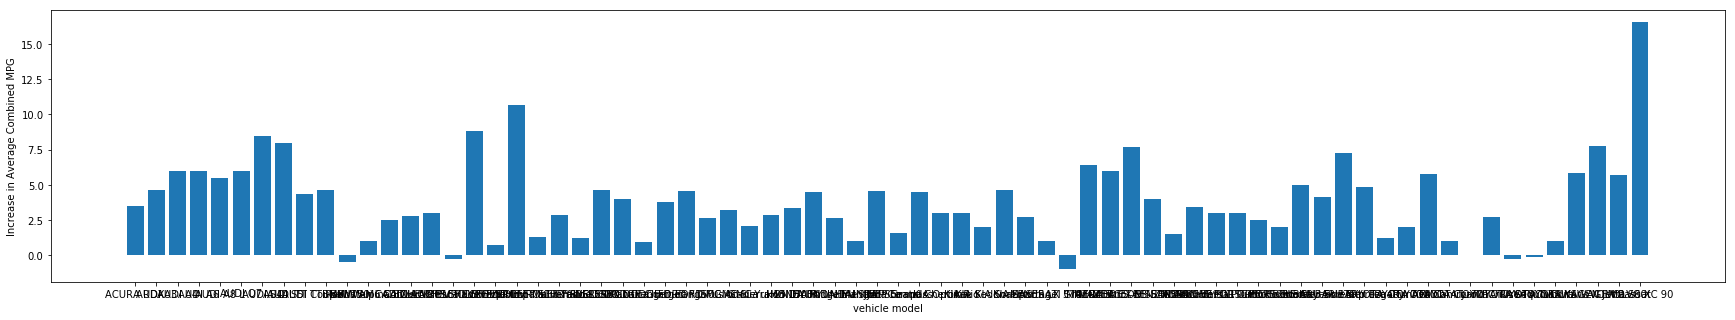

In [45]:
import matplotlib.pyplot as plt
%matplotlib inline
model_mpg.dropna(inplace=True)
plt.subplots(figsize=(30,5))
plt.bar(model_mpg.index, model_mpg)
plt.xlabel('vehicle model')
plt.ylabel('Increase in Average Combined MPG')